In [1]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

from common import functions
from common import optimizer
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# データセットのロード
# iris.data = [(がく片の長さ , がく片の幅 , 花びらの長さ , 花びらの幅)]
iris = datasets.load_iris()

x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

# トレーニングデータ（80％）とテストデータ（20％）に分割
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=0)

Generation: 10. 誤差 = 1.5892272368245124
Generation: 20. 誤差 = 8.301642527048488
Generation: 30. 誤差 = 4.482452862164862
Generation: 40. 誤差 = 1.8529146301232036
Generation: 50. 誤差 = 2.418116898039253
Generation: 60. 誤差 = 2.1053951032242213
Generation: 70. 誤差 = 1.4127266200544955
Generation: 80. 誤差 = 1.8976720674827763
Generation: 90. 誤差 = 1.4601784352965046
Generation: 100. 誤差 = 1.06268952058273
Generation: 110. 誤差 = 1.2746679322583725
Generation: 120. 誤差 = 0.5232038571974993
Generation: 130. 誤差 = 1.4325034415585347
Generation: 140. 誤差 = 1.3668125590287103
Generation: 150. 誤差 = 1.0474300640210452
Generation: 160. 誤差 = 0.9458377101556329
Generation: 170. 誤差 = 0.8675917064590235
Generation: 180. 誤差 = 0.722781577857983
Generation: 190. 誤差 = 0.8273750651350303
Generation: 200. 誤差 = 0.6683582620922989
Generation: 210. 誤差 = 0.5285311018975415
Generation: 220. 誤差 = 0.15383635000246054
Generation: 230. 誤差 = 0.5312682348330091
Generation: 240. 誤差 = 0.6566116037487545
Generation: 250. 誤差 = 0.412892

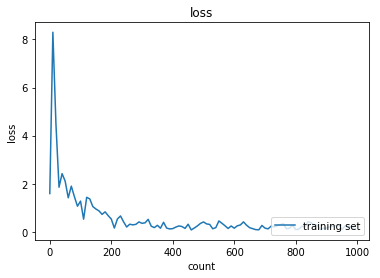

In [2]:
# 学習率
learning_rate = 0.001

# 重み補正係数
weight_init = 0.01

# 入力層
input_layer_size = 3

# 中間層
hidden_layer_size1 = 10
hidden_layer_size2 = 20

# 出力層
output_layer_size = 1

# 学習回数(1万回)
learning_num = 1000

# 描写頻度
plot_interval=10

# ミニバッチサイズ
batch_size = 10

train_size = len(x_train)

# ネットワークの初期化を実施
def init_network():
    network = {}
    
    # 重みの設定
    # 通常設定
    network['W1'] = weight_init * np.random.randn(input_layer_size, hidden_layer_size1)
    network['W2'] = weight_init * np.random.randn(hidden_layer_size1, output_layer_size)
    network['b1'] = np.zeros(hidden_layer_size1)
    network['b2'] = np.zeros(output_layer_size)  
    return network
    
# 順伝播
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = u2
    
    return z1, y

# 逆伝播
def backward(x, d, z1, y):
    grad = {}
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    delta2 = functions.d_least_square(d, y)
    grad['b2'] = np.sum(delta2, axis=0)
    grad['W2'] = np.dot(z1.T, delta2)
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    grad['b1'] = np.sum(delta1, axis=0)
    grad['W1'] = np.dot(x.T, delta1)
    
    return grad

# 正答率
def accuracy(x, d):
    z1, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

# パラメータの初期化
network = init_network()

losses = []

for i in range(learning_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    y_batch = y_train[batch_mask]
    y_batch = y_batch[:, np.newaxis]
    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, y_batch, z1, y)

    # optimizerの設定
    opt = optimizer.Momentum(learning_rate)
    opt.update(network, grad)

    if (i + 1) % plot_interval == 0:
        loss = functions.least_square(y_batch, y)
        losses.append(loss)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))


lists = range(0, learning_num, plot_interval)
plt.plot(lists, losses, label="training set")
plt.legend(loc="lower right")
plt.title("loss")
plt.xlabel("count")
plt.ylabel("loss")
# グラフの表示
plt.show()